In [762]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb

In [763]:
Train = pd.read_csv("Train_DataSet (1).csv")
Test = pd.read_csv("Test_Dataset (1).csv")

## Preprocess the data

**You can treat the Outliers, Nulls**

**Avoid dropping Nulls from test set provided, treat them.**

**Replace special characters from the features that have them**

**Treat Null Values for Test Set**

**Converting columns to appropriate type in both train and test**

**Encode the data**

**Fit the model on train set**

In [764]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     4000 non-null   int64  
 1   Date                                   4000 non-null   object 
 2   number of bedrooms                     3659 non-null   float64
 3   number of bathrooms                    3774 non-null   float64
 4   living area                            3800 non-null   float64
 5   lot area                               3920 non-null   float64
 6   number of floors                       4000 non-null   float64
 7   waterfront present                     4000 non-null   int64  
 8   number of views                        4000 non-null   int64  
 9   condition of the house                 4000 non-null   int64  
 10  grade of the house                     4000 non-null   int64  
 11  Area

In [765]:
Train[Train.duplicated()==True]

,ID,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price


In [766]:
from datetime import datetime

Train['Date']=pd.to_datetime(Train['Date'])
Test['Date']=pd.to_datetime(Test['Date'])
Train['Date']=Train['Date'].map(pd.datetime.toordinal)
Test['Date']=Test['Date'].map(pd.datetime.toordinal)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [767]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     17597 non-null  int64  
 1   Date                                   17597 non-null  int64  
 2   number of bedrooms                     15897 non-null  float64
 3   number of bathrooms                    16840 non-null  float64
 4   living area                            16797 non-null  float64
 5   lot area                               17242 non-null  float64
 6   number of floors                       17597 non-null  float64
 7   waterfront present                     17597 non-null  int64  
 8   number of views                        17597 non-null  int64  
 9   condition of the house                 17597 non-null  int64  
 10  grade of the house                     17597 non-null  int64  
 11  Ar

In [768]:
print("Train :", Train.shape,"  and Test : ", Test.shape)

Train : (17597, 21)   and Test :  (4000, 20)


#  Checking for Null

In [769]:
Train.isna().sum()

ID                                          0
Date                                        0
number of bedrooms                       1700
number of bathrooms                       757
living area                               800
lot area                                  355
number of floors                            0
waterfront present                          0
number of views                             0
condition of the house                      0
grade of the house                          0
Area of the house(excluding basement)       0
Area of the basement                        0
Built Year                                  0
Renovation Year                             0
Postal Code                                 0
living_area_renov                           0
lot_area_renov                              0
Number of schools nearby                    0
Distance from the airport                   0
Price                                       0
dtype: int64

# Imputing zero values with Column mean,median or mode

In [770]:
Train['number of bedrooms'].fillna(Train['number of bedrooms'].median(), inplace=True)
Train['number of bathrooms'].fillna(Train['number of bathrooms'].median(), inplace=True)
Train['living area'].fillna(Train['living area'].median(), inplace=True)
Train['lot area'].fillna(Train['lot area'].median(), inplace=True)

Test['number of bedrooms'].fillna(Test['number of bedrooms'].median(), inplace=True)
Test['number of bathrooms'].fillna(Test['number of bathrooms'].median(), inplace=True)
Test['living area'].fillna(Test['living area'].median(), inplace=True)
Test['lot area'].fillna(Test['lot area'].median(), inplace=True)

In [771]:
Train.isna().sum()

ID                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

# Checking Columns for Zeroes

In [772]:
# Number of Zeroes in each column
print("\n\n\n TRAIN \n\n\n")
col=Train.columns

i=col[7]
for i in col:
    print(i, (Train[i]==0).sum())
    
print("\n\n\n TEST \n\n\n")    
col=Test.columns

i=col[7]
for i in col:
    print(i, (Test[i]==0).sum())  




 TRAIN 



ID 0
Date 0
number of bedrooms 0
number of bathrooms 0
living area 0
lot area 0
number of floors 0
waterfront present 17462
number of views 15870
condition of the house 0
grade of the house 0
Area of the house(excluding basement) 0
Area of the basement 10676
Built Year 0
Renovation Year 16834
Postal Code 0
living_area_renov 0
lot_area_renov 0
Number of schools nearby 0
Distance from the airport 0
Price 0



 TEST 



ID 0
Date 0
number of bedrooms 0
number of bathrooms 0
living area 0
lot area 0
number of floors 0
waterfront present 3972
number of views 3605
condition of the house 0
grade of the house 0
Area of the house(excluding basement) 0
Area of the basement 2434
Built Year 0
Renovation Year 3849
Postal Code 0
living_area_renov 0
lot_area_renov 0
Number of schools nearby 0
Distance from the airport 0


# Since zeroes make sense in these columns, no need to treat

In [773]:
Train['Renovation Year'].value_counts(normalize=True)

0       0.956640
2014    0.004717
2013    0.001875
2003    0.001705
2005    0.001591
          ...   
1934    0.000057
1951    0.000057
1946    0.000057
1959    0.000057
1944    0.000057
Name: Renovation Year, Length: 69, dtype: float64

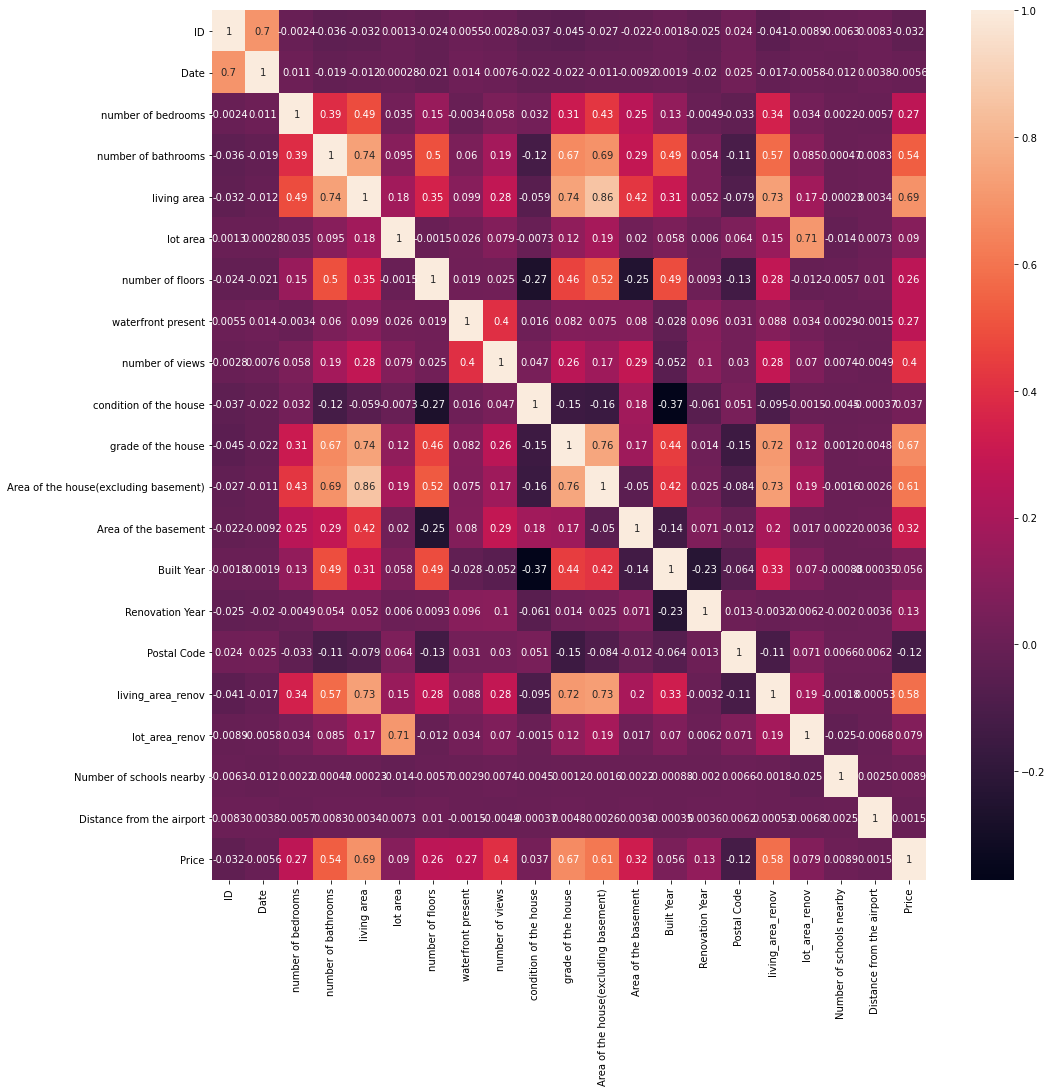

In [774]:
#plt.figure(figsize=(10,10)
plt.figure(figsize=(16,16))
sns.heatmap(Train.corr(), annot=True)

In [775]:
Train.head()

,ID,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,65424671,735968,5.0,2.50,3650.0,9050.0,2.0,0,4,5,...,3370,280,1921,0,122003,2880,5400,2,58,2380000
1,65424672,735968,4.0,2.50,2920.0,4000.0,1.5,0,0,5,...,1910,1010,1909,0,122004,2470,4000,2,51,1400000
2,65424673,735968,3.0,2.75,2910.0,9480.0,1.5,0,0,3,...,2910,0,1939,0,122004,2940,6600,1,53,1200000
3,65424674,735968,4.0,2.50,3310.0,42998.0,2.0,0,0,3,...,3310,0,2001,0,122005,3350,42847,3,76,838000
4,65424675,735968,3.0,2.00,2710.0,4500.0,1.5,0,0,4,...,1880,830,1929,0,122006,2060,4500,1,51,805000


In [776]:
Train['Postal Code'] = pd.Categorical(Train["Postal Code"]).codes
Train.head()

,ID,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,65424671,735968,5.0,2.50,3650.0,9050.0,2.0,0,4,5,...,3370,280,1921,0,0,2880,5400,2,58,2380000
1,65424672,735968,4.0,2.50,2920.0,4000.0,1.5,0,0,5,...,1910,1010,1909,0,1,2470,4000,2,51,1400000
2,65424673,735968,3.0,2.75,2910.0,9480.0,1.5,0,0,3,...,2910,0,1939,0,1,2940,6600,1,53,1200000
3,65424674,735968,4.0,2.50,3310.0,42998.0,2.0,0,0,3,...,3310,0,2001,0,2,3350,42847,3,76,838000
4,65424675,735968,3.0,2.00,2710.0,4500.0,1.5,0,0,4,...,1880,830,1929,0,3,2060,4500,1,51,805000


In [777]:
Train['Postal Code'].value_counts(normalize=True)

25    0.028073
2     0.027448
3     0.026652
21    0.026198
30    0.025914
        ...   
10    0.005171
59    0.004660
33    0.003466
68    0.002387
57    0.002387
Name: Postal Code, Length: 70, dtype: float64

In [778]:
Train.isna().sum()

ID                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [779]:
Train.drop(['ID','Date','Distance from the airport','Number of schools nearby'], axis=1,inplace=True)
Test.drop(['ID','Date','Distance from the airport','Number of schools nearby'], axis=1,inplace=True)
#'Date','lot area','lot_area_renov','Number of schools nearby'

In [780]:
#sns.pairplot(Train[['number of bedrooms', 'number of bathrooms', 'living area',
     #  'number of floors', 'condition of the house', 'grade of the house',
      # 'Area of the house(excluding basement)', 'Area of the basement',
      # 'Built Year', 'Renovation Year', 'Postal Code', 'living_area_renov']])


In [781]:
Test.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'living_area_renov',
       'lot_area_renov'],
      dtype='object')

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'living_area_renov',
       'lot_area_renov', 'Price'],
      dtype='object')


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


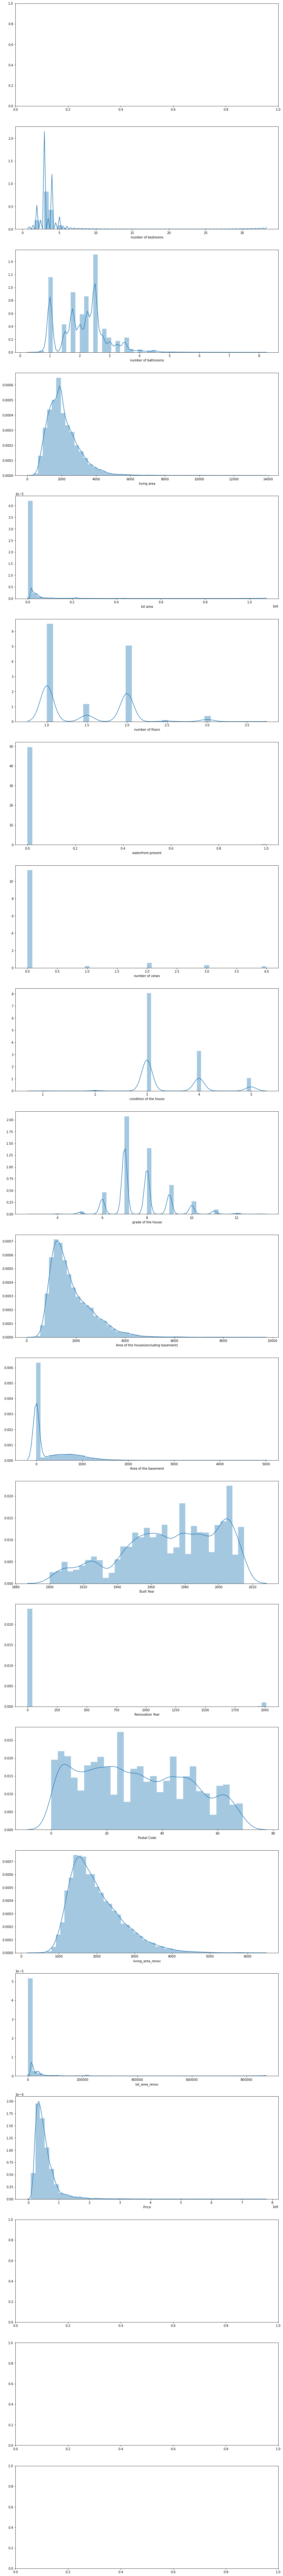

In [782]:
cols=Train.columns
print(cols)
fig, axes = plt.subplots(21,1,figsize=(15,150))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
k=1
i=cols[0]
for i in cols:
    sns.distplot(Train[i],ax=axes[k])
    k=k+1
#for i in col:
#         sns.distplot
#         
plt.show()

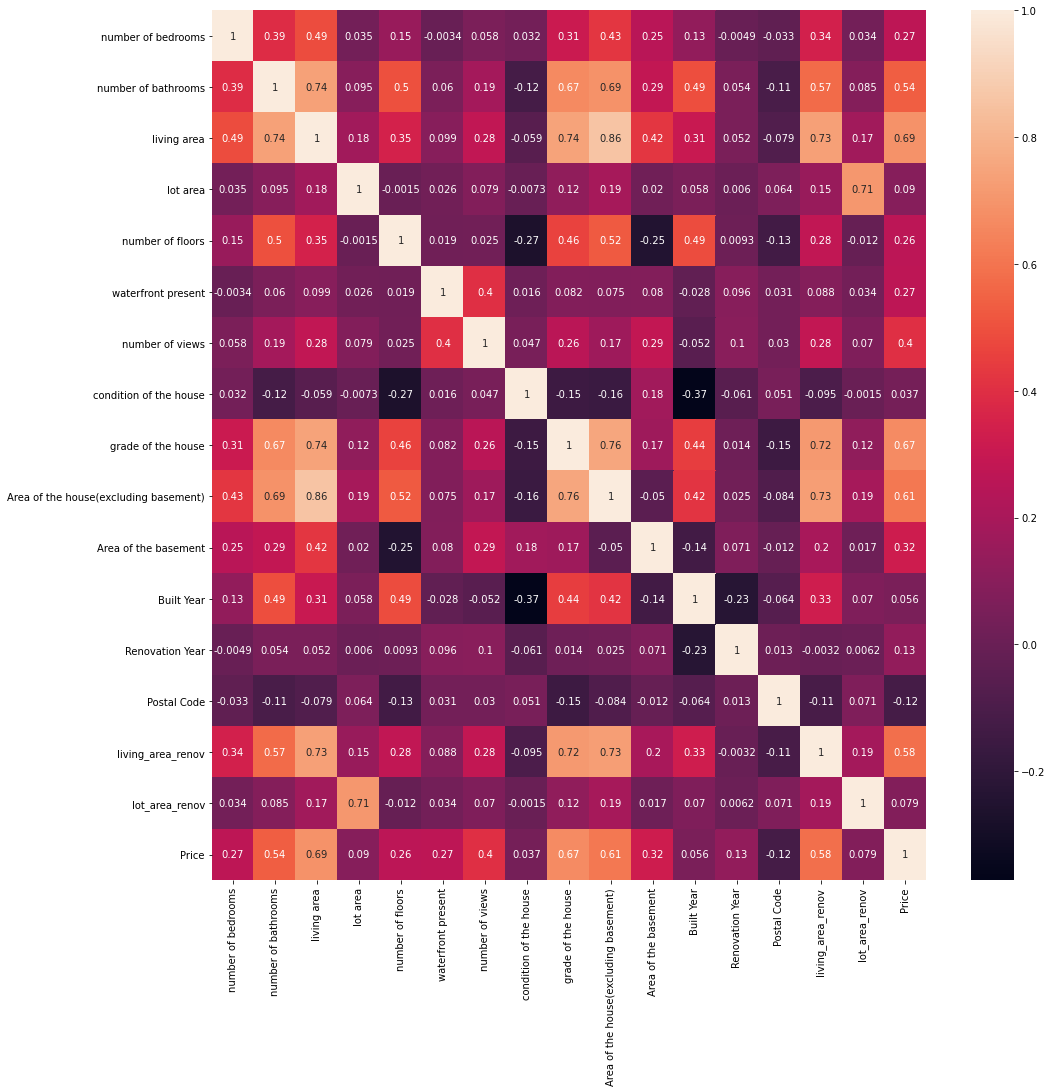

In [783]:
#plt.figure(figsize=(10,10)
plt.figure(figsize=(16,16))
sns.heatmap(Train.corr(), annot=True)

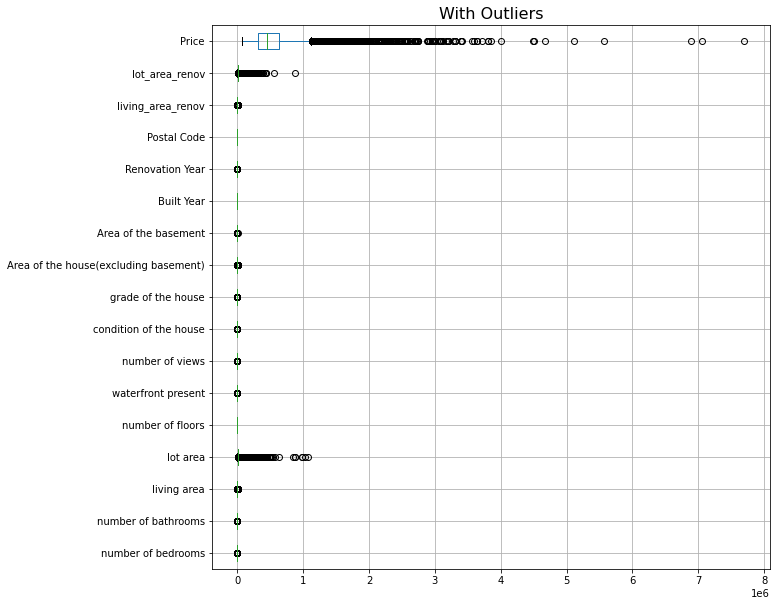

In [784]:
plt.figure(figsize=(10,10))
Train.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [785]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [786]:
for column in Train.columns:
    lr,ur=remove_outlier(Train[column])
    Train[column]=np.where(Train[column]>ur,ur,Train[column])
    Train[column]=np.where(Train[column]<lr,lr,Train[column])

In [787]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [788]:
# Copy all the predictor variables into X dataframe
X = Train.drop(['Price'], axis=1)
#Test.drop('Area of the house(excluding basement)',axis=1,inplace=True)
# Copy target into the y dataframe. 
y = Train[['Price']]

In [789]:
print(X.shape,y.shape)
from sklearn import linear_model
from sklearn.linear_model import ARDRegression, LinearRegression

(17597, 16) (17597, 1)


In [790]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [791]:
regression_model = ARDRegression()
regression_model.fit(X_train, y_train)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ARDRegression()

In [792]:
regression_model.n_features_in_

16

In [793]:
X_train.shape

(12317, 16)

In [794]:
Test.shape

(4000, 16)

In [795]:
predicted=regression_model.predict(Test)

In [796]:
regression_model.score(X_train, y_train)

0.6736793916017654

In [797]:

regression_model.score(X_test, y_test)

0.6823455287280578

In [798]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


142430.03270600352

In [799]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


139136.15621805534

In [747]:
from sklearn.linear_model import LogisticRegression

In [748]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [749]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [750]:
xgb1 = xgb.XGBRegressor()

In [751]:
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.001,0.005], #so called `eta` value
              'max_depth': [6,7,8],
              'min_child_weight': [5,6,7],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 4,
                        verbose=False)

In [752]:


xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [753]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [754]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.005,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [755]:
from numpy import nan
from sklearn import neighbors
from sklearn.ensemble import BaggingRegressor

In [800]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(50), 
                    solver='adam',random_state=1, 
                    max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=1)
dtr = tree.DecisionTreeRegressor(random_state=1)
regression_model = LinearRegression()
regXGB=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=0)
bag=BaggingRegressor(random_state=1)



#logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=1)
#rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

models=[regXGB,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print(str(i))
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(X_train_scaled,y_train)
        scores_train.append(i.score(X_train_scaled, y_train))
        scores_test.append(i.score(X_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Reg XGB','RFR']))

#['Random Forest Regressor','Decision Tree Regressor','Linear Regression','XG Boost']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=0)
RandomForestRegressor(random_state=1)


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


           Train RMSE      Test RMSE  Training Score  Test Score
Reg XGB  25680.104707   86210.291692        0.989392    0.878047
RFR      40145.824666  101851.980315        0.974075    0.829779


In [801]:
regXGB.feature_importances_

array([0.01096206, 0.01878302, 0.05961527, 0.01109761, 0.01766326,
       0.        , 0.        , 0.0226174 , 0.688357  , 0.01847366,
       0.01700785, 0.03302458, 0.        , 0.06112865, 0.02642135,
       0.01484832], dtype=float32)

In [758]:
predicted=regXGB.predict(Test)

In [759]:
submission=pd.read_csv('Sample Submission-1.csv')
#import the sample submission file provided.

In [760]:
submission['Price']= predicted 
#replace the CTC column values with predicted values

In [761]:
submission.to_csv('Submission_one.csv',index=False) 
#this will save the file as csv and upload the saved file to the platform from your login credetials to see RMSE

All the best!!